In [1]:
from matplotlib import pyplot as plt
from itertools import product
import seaborn as sns
import pandas as pd
import os.path as op
import argparse
import re
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy import signal
from scipy.fft import fftshift
from bids import BIDSLayout
from statsmodels.stats.anova import AnovaRM

from util.io.ffr import *

In [2]:
fs = 1200

In [4]:
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
subs = layout.get_subjects(scope = 'preprocess_ffr')
subs.sort(key = int)
epochs = []

for sub in subs:
    if epochs == []:
        epochs = read_epochs(sub, 'forFFR')
    epochs = mne.concatenate_epochs([epochs, read_epochs(sub, 'forFFR')])

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
5196 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5196 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
5196 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
5196 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
10392 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-4/sub-4_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-4/sub-4_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
1331 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1331 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
11723 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-5/sub-5_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-5/sub-5_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2340 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2340 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
14063 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-6/sub-6_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-6/sub-6_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3539 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3539 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
17602 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-7/sub-7_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-7/sub-7_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3815 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3815 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
21417 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-8/sub-8_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-8/sub-8_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3381 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3381 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
24798 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-9/sub-9_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-9/sub-9_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3524 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3524 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
28322 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3342 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3342 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
31664 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3328 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3328 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
34992 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3284 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3284 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
38276 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-13/sub-13_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-13/sub-13_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3990 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3990 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
42266 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3954 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3954 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
46220 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3478 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3478 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
49698 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3226 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3226 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
52924 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-18/sub-18_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-18/sub-18_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3336 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3336 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
56260 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2616 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2616 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
58876 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
1373 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1373 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
60249 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3716 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3716 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
63965 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-22/sub-22_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3196 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3196 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
67161 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-23/sub-23_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3996 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3996 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
71157 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-24/sub-24_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-24/sub-24_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4051 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4051 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
75208 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-25/sub-25_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-25/sub-25_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3719 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3719 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
78927 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-26/sub-26_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-26/sub-26_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3339 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3339 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
82266 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-27/sub-27_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3027 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3027 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
85293 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-28/sub-28_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
2504 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2504 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
87797 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-29/sub-29_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
624 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
624 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
88421 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-30/sub-30_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-30/sub-30_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3410 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3410 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
91831 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-31/sub-31_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-31/sub-31_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3373 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3373 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
95204 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-32/sub-32_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-32/sub-32_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4256 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4256 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
99460 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-33/sub-33_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-33/sub-33_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4350 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4350 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
103810 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-34/sub-34_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-34/sub-34_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3387 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3387 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
107197 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-35/sub-35_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-35/sub-35_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3777 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3777 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
110974 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-36/sub-36_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-36/sub-36_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3026 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3026 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
114000 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-37/sub-37_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-37/sub-37_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
4092 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4092 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
118092 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-38/sub-38_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-38/sub-38_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3942 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3942 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
122034 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-39/sub-39_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-39/sub-39_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3511 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3511 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
125545 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-40/sub-40_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-40/sub-40_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
1810 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1810 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
127355 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-41/sub-41_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-41/sub-41_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3389 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3389 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
130744 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-42/sub-42_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-42/sub-42_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3189 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3189 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
133933 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-43/sub-43_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-43/sub-43_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3774 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3774 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
137707 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-44/sub-44_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-44/sub-44_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3821 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3821 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
141528 matching events found
Applying baseline correction (mode: mean)


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-45/sub-45_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-45/sub-45_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -300.00 ...     300.00 ms
        0 CTF compensation matrices available
Not setting metadata
3852 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3852 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
145380 matching events found
Applying baseline correction (mode: mean)


In [5]:
# Compute grand average 
evokeds = {}
evokeds['130'] = epochs['11', '21', '31'].average()
evokeds['200'] = epochs['12', '22', '32'].average()
evokeds['280'] = epochs['31', '32', '33'].average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


#### Compute grand average fft for each tone (in dB)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


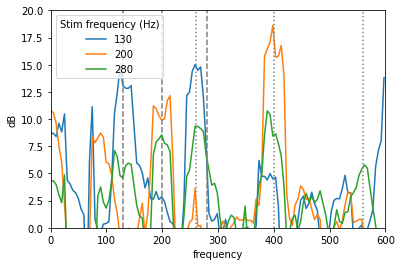

In [6]:
freqs, power = compute_power_dB(evokeds['130'])
plot_psd_dB(freqs, power, 130)
freqs, power = compute_power_dB(evokeds['200'])
plot_psd_dB(freqs, power, 200)
freqs, power = compute_power_dB(evokeds['280'])
plot_psd_dB(freqs, power, 280)
plt.show()

#### Compute grand average fft for each tone (with np.fft())

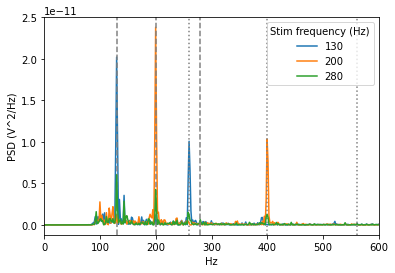

In [7]:
freqs, ps, idx = compute_power_fft(fs, evokeds['130'])
plot_psd_fft(freqs, ps, idx, 130)
freqs, ps, idx = compute_power_fft(fs, evokeds['200'])
plot_psd_fft(freqs, ps, idx, 200)
freqs, ps, idx = compute_power_fft(fs, evokeds['280'])
plot_psd_fft(freqs, ps, idx, 280)
plt.show()

### Plot PSD for each sub

In [8]:
# for sub in subs:
#     sub_epochs = read_epochs(sub, 'forFFR')
#     sub_evokeds = {}
#     sub_evokeds['130'] = sub_epochs['11', '21', '31'].average()
#     sub_evokeds['200'] = sub_epochs['12', '22', '32'].average()
#     sub_evokeds['280'] = sub_epochs['31', '32', '33'].average()
    
#     # PSD in dB
#     freqs, power = compute_power_dB(sub_evokeds['130'])
#     plot_psd_dB(freqs, power, 130)
#     freqs, power = compute_power_dB(sub_evokeds['200'])
#     plot_psd_dB(freqs, power, 200)
#     freqs, power = compute_power_dB(sub_evokeds['280'])
#     plot_psd_dB(freqs, power, 280)
#     plt.show()
    
#     # PSD with np.fft()
#     freqs, ps, idx = compute_power_fft(fs, sub_evokeds['130'])
#     plot_psd_fft(freqs, ps, idx, "130")
#     freqs, ps, idx = compute_power_fft(fs, sub_evokeds['200'])
#     plot_psd_fft(freqs, ps, idx, 200)
#     freqs, ps, idx = compute_power_fft(fs, sub_evokeds['280'])
#     plot_psd_fft(freqs, ps, idx, 280)
#     plt.show()



### Look at FFR by target tone identity (with np.fft())

In [9]:
def plot_psd_dB(freqs, power, stim_freq, target_freq):
    plt.plot(freqs, power, label = str(target_freq))
    plt.xlabel('frequency')
    plt.ylabel('dB')
    plt.xlim(0, 600)
    plt.ylim(0, 20)
    plt.axvline(stim_freq, linestyle = '--', color = 'grey')
    plt.axvline(stim_freq*2, linestyle = 'dotted', color = 'grey')
    plt.legend(title = 'Target frequency (Hz)')
    plt.title(f'Stim frequency: {str(stim_freq)} Hz')
    
def plot_psd_fft(freqs, ps, idx, stim_freq, target_freq):
    plt.plot(freqs[idx], ps[idx], label = str(target_freq))
    plt.legend(title = 'Target frequency (Hz)')
    plt.xlabel("Hz")
    plt.ylabel("PSD (V^2/Hz)")
    plt.xlim(0, 600)
    plt.axvline(stim_freq, linestyle = '--', color = 'grey')
    plt.axvline(stim_freq*2, linestyle = 'dotted', color = 'grey')
    plt.title(f'Stim frequency: {str(stim_freq)} Hz')

In [ ]:
# Look at FFR by target tone identity
conditions = list(epochs.event_id.keys())
evokeds = {c:epochs[c].average() for c in conditions}

In [ ]:
# ffr for 130 Hz tone at different target conditions
freqs, power = compute_power_dB(evokeds['11'])
plot_psd_dB(freqs, power, 130, "130")
freqs, power = compute_power_dB(evokeds['21'])
plot_psd_dB(freqs, power, 130, "200")
freqs, power = compute_power_dB(evokeds['31'])
plot_psd_dB(freqs, power, 130, "280")
plt.show()

freqs, ps, idx = compute_power_fft(fs, evokeds['11'])
plot_psd_fft(freqs, ps, idx, 130, "130")
freqs, ps, idx = compute_power_fft(fs, evokeds['21'])
plot_psd_fft(freqs, ps, idx, 130, "200")
freqs, ps, idx = compute_power_fft(fs, evokeds['31'])
plot_psd_fft(freqs, ps, idx, 130, "280")
plt.show()

In [ ]:
# ffr for 200 Hz tone at different target conditions
freqs, power = compute_power_dB(evokeds['12'])
plot_psd_dB(freqs, power, 200, "130")
freqs, power = compute_power_dB(evokeds['22'])
plot_psd_dB(freqs, power, 200, "200")
freqs, power = compute_power_dB(evokeds['32'])
plot_psd_dB(freqs, power, 200, "280")
plt.show()

freqs, ps, idx = compute_power_fft(fs, evokeds['12'])
plot_psd_fft(freqs, ps, idx, 200, "130")
freqs, ps, idx = compute_power_fft(fs, evokeds['22'])
plot_psd_fft(freqs, ps, idx, 200, "200")
freqs, ps, idx = compute_power_fft(fs, evokeds['32'])
plot_psd_fft(freqs, ps, idx, 200, "280")
plt.show()

In [ ]:
# ffr for 280 Hz tone at different target conditions
freqs, power = compute_power_dB(evokeds['13'])
plot_psd_dB(freqs, power, 280, "130")
freqs, power = compute_power_dB(evokeds['23'])
plot_psd_dB(freqs, power, 280, "200")
freqs, power = compute_power_dB(evokeds['33'])
plot_psd_dB(freqs, power, 280, "280")
plt.show()

freqs, ps, idx = compute_power_fft(fs, evokeds['13'])
plot_psd_fft(freqs, ps, idx, 280, "130")
freqs, ps, idx = compute_power_fft(fs, evokeds['23'])
plot_psd_fft(freqs, ps, idx, 280, "200")
freqs, ps, idx = compute_power_fft(fs, evokeds['33'])
plot_psd_fft(freqs, ps, idx, 280, "280")
plt.show()

## ANOVA

In [12]:
# Look at FFR by target tone identity
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
subs = layout.get_subjects(scope = 'preprocess_ffr')
subs.sort(key = int)
spectrums = []
conditions = list(epochs.event_id.keys())

for sub in subs:
        
    # Read epochs object
    epochs = read_epochs(sub, 'forFFR')

    # Get evoked potentials
    evokeds = {c:epochs[c].average() for c in conditions}

    conditions = list(epochs.event_id.keys())

    # Iterate over conditions
    for condition in conditions:
        
        # Compute power in dB
        freqs, power = compute_power_dB(evokeds[condition])
        df = pd.DataFrame(
            {'subject': sub,
             'target': int(condition[0]),
             'stimulus': int(condition[1]),
             'frequency': freqs,
             'power': power
            }
        )
        spectrums.append(df)
    
# # Create dataframe and save
# spectrums = pd.concat(spectrums)
# spectrums.to_csv('spectrums.csv', sep = '\t', index = False)

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz']


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-4/sub-4_task-pitch_run-1_desc-forFFR_epo.fif.gz']


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-5/sub-5_task-pitch_run-1_desc-forFFR_epo.fif.gz']


/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking_attention/analysis/../data/bids/derivatives/preprocess_ffr/sub-6/sub-6_task-pitch_run-1_desc-forFFR_epo.fif.gz']


KeyboardInterrupt: 

In [70]:
# Clean data
bad_subs = [43] # subject 43 had flat aux channel
for bad_sub in bad_subs:
    spectrums = spectrums[spectrums['subject'] != bad_sub]
spectrums['target'] = spectrums['target'].replace({1: 130, 2: 200, 3:280})
spectrums['stimulus'] = spectrums['stimulus'].replace({1: 130, 2: 200, 3:280})
spectrums
spectrums.to_csv('spectrums.csv', sep = '\t', index = False)

#### f0 only

In [53]:
# Run ANOVA
targets = (130, 200, 280)
target_freqs = (130, 200, 280)
all_stims_power = []

for target, target_freq in zip(targets, target_freqs):
    print(target, target_freq)
    
    idx = np.abs(spectrums.frequency - target_freq).argmin()
    hz = spectrums.frequency[idx]
    power_f0 = spectrums[spectrums.frequency == hz]
    power_f0 = power_f0[power_f0.stimulus == target]
    power_f0 = power_f0.groupby(['subject', 'target', 'stimulus'], as_index=False).mean()
    print(power_f0)

    all_stims_power.append(power_f0)
    
    aov = AnovaRM(
        data = power_f0, 
        depvar = 'power',
        subject = 'subject', 
        within = ['target']
    )
    res = aov.fit()
    print(res)

1 130
     subject  target  stimulus   frequency      power
0          3       1         1  129.460581   2.126778
1          3       2         1  129.460581   7.821449
2          3       3         1  129.460581   6.387437
3          4       1         1  129.460581   3.763498
4          4       2         1  129.460581   4.520233
..       ...     ...       ...         ...        ...
118       44       2         1  129.460581   4.182297
119       44       3         1  129.460581  11.141379
120       45       1         1  129.460581   8.569241
121       45       2         1  129.460581   2.632355
122       45       3         1  129.460581  -3.229713

[123 rows x 5 columns]
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
target  1.8277 2.0000 80.0000 0.1674

2 200
     subject  target  stimulus   frequency      power
0          3       1         2  199.170124  13.404860
1          3       2         2  199.170124  14.143326
2          3       3 

In [24]:
all_stims_power = pd.concat(all_stims_power)
aov = AnovaRM(
    data = all_stims_power, 
    depvar = 'power',
    subject = 'subject', 
    within = ['target', 'stimulus']
)
res = aov.fit()
print(res)

                    Anova
                F Value Num DF  Den DF  Pr > F
----------------------------------------------
target           5.4452 2.0000  80.0000 0.0061
stimulus        10.6455 2.0000  80.0000 0.0001
target:stimulus  0.5938 4.0000 160.0000 0.6676



#### Including harmonic

In [18]:
# Run ANOVA
targets = (130, 200, 280)
target_freqs = (130, 200, 280)
all_stims_all_harmonics_power = []

for target, target_freq in zip(targets, target_freqs):
    print(target, target_freq)
    
    idx = np.abs(spectrums.frequency - target_freq).argmin()
    hz = spectrums.frequency[idx]
    idx = np.abs(spectrums.frequency - target_freq*2).argmin()
    hz_harmonic1 = spectrums.frequency[idx]
    power_f0 = spectrums[(spectrums.frequency == hz) | (spectrums.frequency == hz_harmonic1)]
    power_f0 = power_f0[power_f0.stimulus == target]
    power_all_harmonics = power_f0.groupby(['subject', 'target', 'stimulus'], as_index=False).mean()
    print(power_all_harmonics)

    all_stims_all_harmonics_power.append(power_all_harmonics)
    
    aov = AnovaRM(
        data = power_all_harmonics, 
        depvar = 'power',
        subject = 'subject', 
        within = ['target']
    )
    res = aov.fit()
    print(res)

1 130
     subject  target  stimulus   frequency     power
0          3       1         1  194.190871  4.499763
1          3       2         1  194.190871  7.971883
2          3       3         1  194.190871  7.028215
3          4       1         1  194.190871  0.440029
4          4       2         1  194.190871  1.040998
..       ...     ...       ...         ...       ...
118       44       2         1  194.190871  4.415900
119       44       3         1  194.190871  8.612995
120       45       1         1  194.190871  4.805131
121       45       2         1  194.190871  2.140006
122       45       3         1  194.190871 -0.236524

[123 rows x 5 columns]
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
target  3.8257 2.0000 80.0000 0.0259

2 200
     subject  target  stimulus   frequency      power
0          3       1         2  298.755187   9.090899
1          3       2         2  298.755187  13.300174
2          3       3         2  2

In [25]:
all_stims_all_harmonics_power = pd.concat(all_stims_all_harmonics_power)
aov = AnovaRM(
    data = all_stims_all_harmonics_power, 
    depvar = 'power',
    subject = 'subject', 
    within = ['target', 'stimulus']
)
res = aov.fit()
print(res)

                    Anova
                F Value Num DF  Den DF  Pr > F
----------------------------------------------
target           4.2057 2.0000  80.0000 0.0183
stimulus        14.5958 2.0000  80.0000 0.0000
target:stimulus  0.8158 4.0000 160.0000 0.5168



## Plots on subject level, with SE

In [2]:
# Load data
bad_subs = [43] # subject 43 had flat aux channel
spectrums = pd.read_csv('spectrums.csv', sep = '\t')
for bad_sub in bad_subs:
    spectrums = spectrums[spectrums['subject'] != bad_sub]
spectrums['target'] = spectrums['target'].replace({1: 130, 2: 200, 3:280})
spectrums['stimulus'] = spectrums['stimulus'].replace({1: 130, 2: 200, 3:280})
spectrums

,subject,target,stimulus,frequency,power
0,3,130,130,0.000000,5.289243
1,3,130,130,4.979253,5.347941
2,3,130,130,9.958506,5.533879
3,3,130,130,14.937759,5.417680
4,3,130,130,19.917012,5.271016
...,...,...,...,...,...
44644,45,280,280,577.593361,2.571565
44645,45,280,280,582.572614,2.259651
44646,45,280,280,587.551867,1.317281
44647,45,280,280,592.531120,2.590665


Text(0.5, 0, 'Frequency (Hz)')

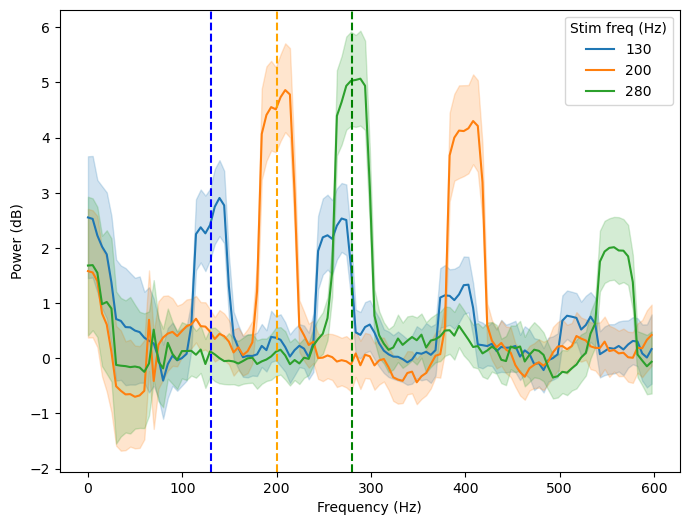

In [12]:
# By stimulus freq
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrums, x = "frequency", y = "power", hue = "stimulus", palette = 'tab10', ax = ax)
graph.axvline(130, linestyle = 'dashed', color = 'blue')
graph.axvline(200, linestyle = 'dashed', color = 'orange')
graph.axvline(280, linestyle = 'dashed', color = 'green')
graph.legend(title = 'Stim freq (Hz)')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

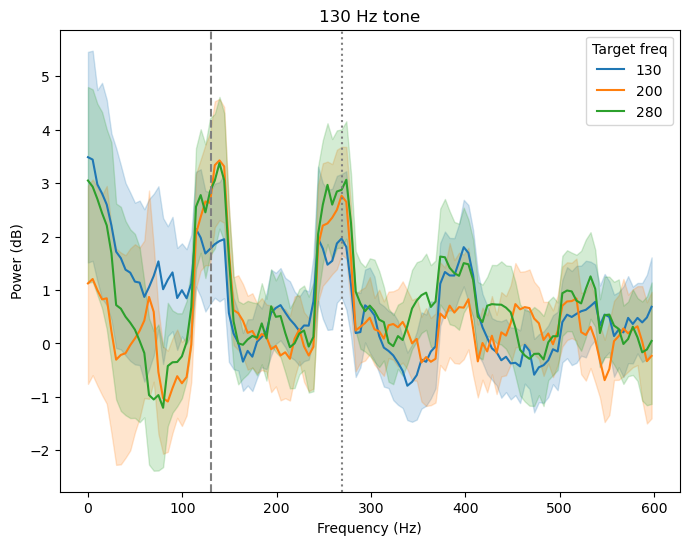

In [5]:
# ffr for 130 Hz tone at different target conditions
spectrum_target = spectrums[spectrums.stimulus == 130]
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrum_target, x = "frequency", y = "power", hue = "target", palette = 'tab10', ax = ax)
graph.axvline(130, linestyle = 'dashed', color = 'grey')
graph.axvline(269, linestyle = 'dotted', color = 'grey')
graph.legend(title = 'Target freq')
graph.set_title('130 Hz tone')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)")

Text(0.5, 0, 'Frequency (Hz)')

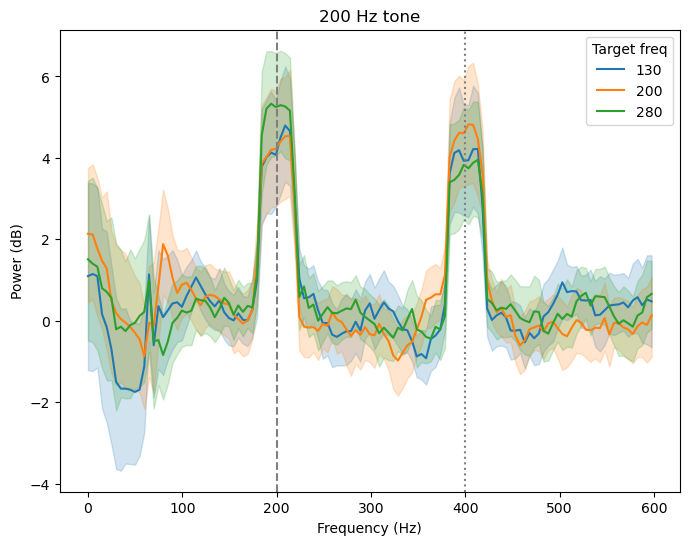

In [6]:
# ffr for 200 Hz tone at different target conditions
spectrum_target = spectrums[spectrums.stimulus == 200]
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrum_target, x = "frequency", y = "power", hue = "target", palette = 'tab10', ax = ax)
graph.axvline(200, linestyle = 'dashed', color = 'grey')
graph.axvline(400, linestyle = 'dotted', color = 'grey')
graph.legend(title = 'Target freq')
graph.set_title('200 Hz tone')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)") 
# 280 Hz target higher than others

Text(0.5, 0, 'Frequency (Hz)')

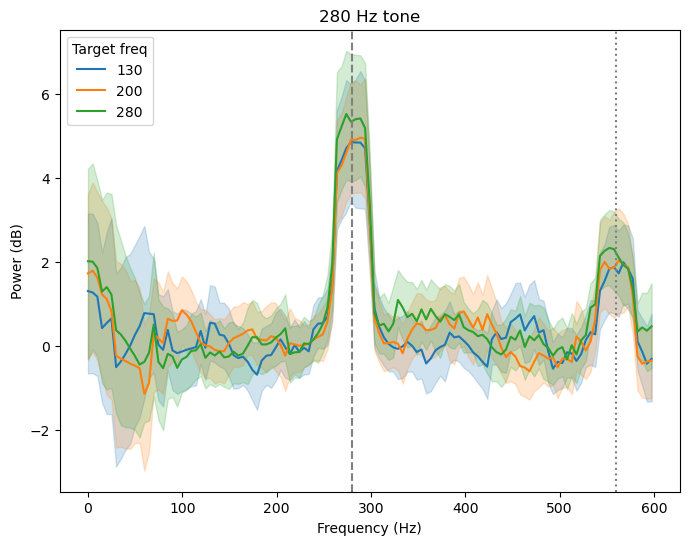

In [11]:
# ffr for 200 Hz tone at different target conditions
spectrum_target = spectrums[spectrums.stimulus == 280]
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrum_target, x = "frequency", y = "power", hue = "target", palette = 'tab10', ax = ax)
graph.axvline(280, linestyle = 'dashed', color = 'grey')
graph.axvline(560, linestyle = 'dotted', color = 'grey')
graph.legend(title = 'Target freq')
graph.set_title('280 Hz tone')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)") 